In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#df = pd.read_csv("./Desktop/Depaul/csc529/Homework/Final Project/train.csv")
df = pd.read_csv("./train.csv")
df = df.set_index("id")
print("The dimenision of the original dataset is ",df.shape)
df.head(5)

The dimenision of the original dataset is  (595212, 58)


,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


0    573518
1     21694
Name: target, dtype: int64


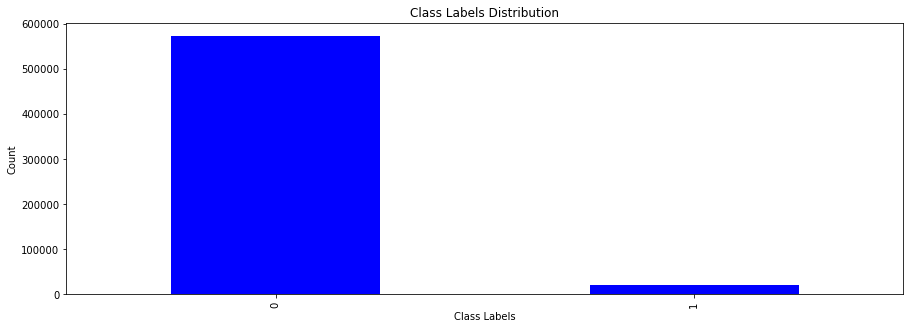

In [5]:
#Visualize the proportion of the target variables
fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(1,1,1)
print(df["target"].value_counts())
df["target"].value_counts().plot(kind='bar', color='blue')
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Labels Distribution")

As we can observe the above, the proportion of class labels (0 & 1) are very imbalanced. SMOTE technique might be one of our approach to achieve a better result. The SMOTE process includes Over-Sampling the Minority Class and Under-Sampling the Majority Class. 

###The following analysis includes NO SMOTE procedure.

In [6]:
#permutate the order of the instance in the original dataset
df2 = df.reindex(np.random.permutation(df.index))
df2.head(5)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
450320,0,1,1,2,1,0,0,0,0,1,...,5,0,2,3,0,1,0,0,1,1
454126,0,1,1,7,0,6,0,0,0,1,...,7,1,4,4,0,1,0,0,0,0
537978,0,5,1,6,0,6,0,1,0,0,...,2,1,5,8,0,1,1,0,0,1
516609,0,5,1,9,0,0,0,1,0,0,...,8,0,5,11,0,0,0,1,1,0
1938,0,4,3,8,1,0,0,0,0,1,...,5,3,2,5,0,1,1,0,0,0


In [7]:
#Set y as the target variable Table
y = df2.target
#Set X as the predictor variables Table
X = df2.ix[:,1:]

In [8]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, 
                                                 #Predictor Variables
                                                 y, 
                                                 #Class labels
                                                 stratify=y, 
                                                 #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,
                                                 #Test size is set as 34% of entire set
                                                 random_state=28 
                                                 # Set the randon state for spliting data  in same order
                                                )

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
#Double check the dimenision of the Data Samples
print("The dimenision of Training Sample is ",x_train.shape)
print("The dimenision of Training Target Classes is ",y_train.shape)
print("The dimenision of Testing Sample is ",x_test.shape)
print("The dimenision of Testing Target Classes is ",y_test.shape)

The dimenision of Training Sample is  (392839, 57)
The dimenision of Training Target Classes is  (392839,)
The dimenision of Testing Sample is  (202373, 57)
The dimenision of Testing Target Classes is  (202373,)
